<a href="https://colab.research.google.com/github/palVikram/Advance_tensorflow/blob/main/ANN_VS_CNN_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [28]:
fmnist=tf.keras.datasets.fashion_mnist

In [29]:
(training_data, training_label), (testing_data, testing_label)= fmnist.load_data()

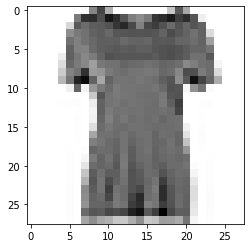

In [30]:
np.set_printoptions(linewidth=320)

plt.imshow(training_data[10], cmap='Greys')

In [31]:
print(training_data[10])

[[  0   0   0   0   0   0   0  11 142 200 106   0   0   0   0   0   0   0  85 185 112   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 152 214 217 194 236 216 187 149 135 153 211 217 231 205 217 188  34   0   0   0   0   0]
 [  0   0   0   0   0  66 185 166 180 181 190 211 221 197 146 198 206 191 168 190 172 188 175   0   0   0   0   0]
 [  0   0   0   0   0 135 153 160 175 180 170 186 187 190 188 190 187 174 195 185 174 161 175  59   0   0   0   0]
 [  0   0   0   0   0 161 147 160 170 178 177 180 168 173 174 171 185 184 185 172 171 164 174 120   0   0   0   0]
 [  0   0   0   0   2 175 146 145 168 178 181 185 180 184 178 179 187 191 193 190 181 171 172 158   0   0   0   0]
 [  0   0   0   0  35 177 155 140 151 172 191 187 186 187 186 187 182 191 194 188 180 161 161 185   0   0   0   0]
 [  0   0   0   0  59 170 153 141 120 154 160 161 172 168 166 161 165 172 170 164 139 149 162 166  21   0   0   0]
 [  0   0   0   0  79 145 160 214 123 128 153 160 164 158 157 154 155 170 165 14

In [32]:
training_data=training_data/255.0
testing_data=testing_data/255.0

In [33]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")
]
)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])


In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 28, 128)           3712      
                                                                 
 flatten_3 (Flatten)         (None, 3584)              0         
                                                                 
 dense_9 (Dense)             (None, 64)                229440    
                                                                 
 dense_10 (Dense)            (None, 10)                650       
                                                                 
Total params: 233,802
Trainable params: 233,802
Non-trainable params: 0
_________________________________________________________________


In [35]:
class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get("loss")<0.4:
      self.model.stop_training=True

In [36]:
callback=mycallback()
history=model.fit(training_data, training_label, epochs=10, callbacks=[callback])

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4427 - accuracy: 0.8428
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3318 - accuracy: 0.8788


In [37]:
model.evaluate(testing_data, testing_label)

313/313 [==============================] - 1s 4ms/step - loss: 0.3549 - accuracy: 0.8673


[0.3548891842365265, 0.8672999739646912]

In [39]:
### USING cnn 
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,kernel_size=(3,3), input_shape=(28,28,1),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")
]
)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 flatten_5 (Flatten)         (None, 7744)              0         
                                                                 
 dense_13 (Dense)            (None, 128)               991360    
                                                                 
 dense_14 (Dense)            (None, 10)                1290      
                                                      

In [40]:
callback=mycallback()
history=model.fit(training_data, training_label, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3900 - accuracy: 0.8604
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2538 - accuracy: 0.9069
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2047 - accuracy: 0.9246
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1676 - accuracy: 0.9380
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1352 - accuracy: 0.9492
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1080 - accuracy: 0.9587
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0872 - accuracy: 0.9666
Epoch 8/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0697 - accuracy: 0.9739
Epoch 9/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0558 - accuracy: 0.9785
Epoch 10/10
1875/1875 [==============================] - 14s 7ms/step - l

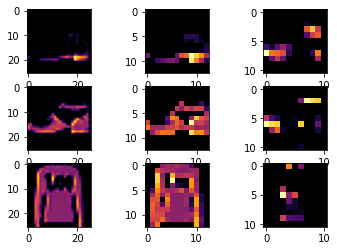

In [46]:
from IPython.core.pylabtools import activate_matplotlib
import matplotlib.pyplot as plt

f,axes =plt.subplots(3,3)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=1
CONVOLUTION_NUMBER=1

layer_outputs=[layer.output for layer in model.layers]
activation_model=tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

for x in range(0,3):
  f1=activation_model.predict(testing_data[FIRST_IMAGE].reshape(1,28,28,1))[x]
  axes[0,x].imshow(f1[0,:,:,CONVOLUTION_NUMBER], cmap='inferno')
  axes[0,x].grid(False)

  f2=activation_model.predict(testing_data[SECOND_IMAGE].reshape(1,28,28,1))[x]
  axes[1,x].imshow(f2[0,:,:,CONVOLUTION_NUMBER], cmap='inferno')
  axes[1,x].grid(False)

  f3=activation_model.predict(testing_data[THIRD_IMAGE].reshape(1,28,28,1))[x]
  axes[2,x].imshow(f3[0,:,:,CONVOLUTION_NUMBER], cmap='inferno')
  axes[2,x].grid(False)